In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy


In [28]:
!pip install mnist
import mnist


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [29]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [30]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [33]:
train_images.shape

(60000, 28, 28, 1)

In [34]:
learning_rate = 0.01
n_epochs = 100
initializer = RandomNormal(mean=0., stddev=1.)

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=n_epochs,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[early_stopping]
)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 3.3126 - categorical_accuracy: 0.5593 - val_loss: 0.4927 - val_categorical_accuracy: 0.8635
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8514 - categorical_accuracy: 0.7581 - val_loss: 0.3242 - val_categorical_accuracy: 0.9031
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5764 - categorical_accuracy: 0.8184 - val_loss: 0.2649 - val_categorical_accuracy: 0.9200
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4673 - categorical_accuracy: 0.8558 - val_loss: 0.2251 - val_categorical_accuracy: 0.9304
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3985 - categorical_accuracy: 0.8766 - val_loss: 0.1942 - val_categorical_accuracy: 0.9410
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3507 - categorical_accuracy: 0.8920 - val_loss: 0.1721 - val_categorical_acc

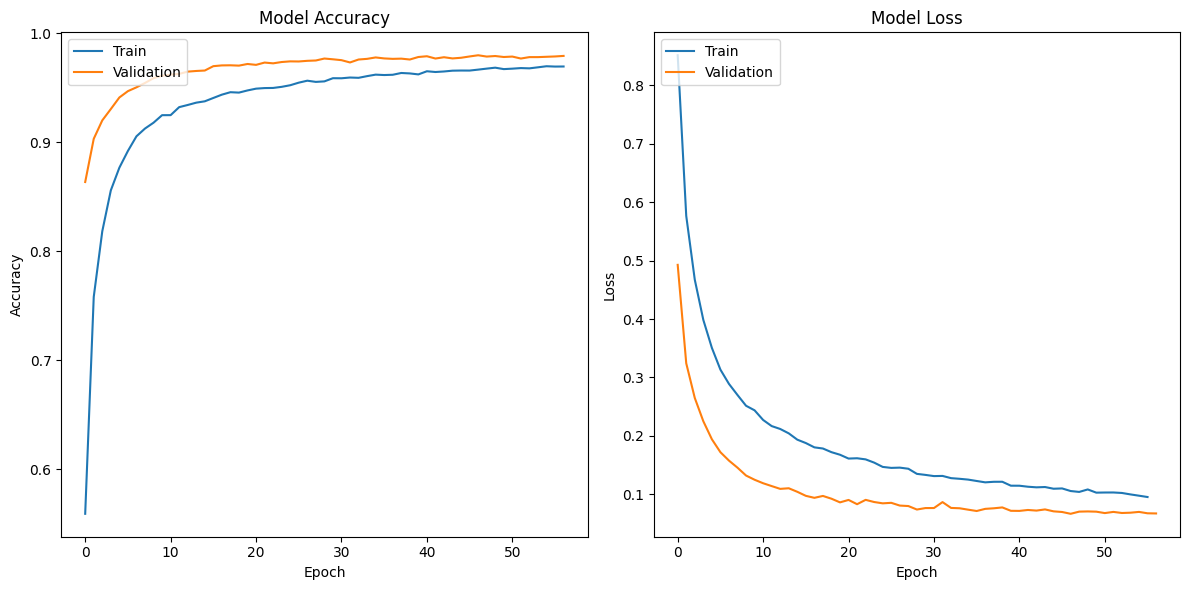

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [38]:
predictions = model.predict(test_images[:5])

print("Predictions:", np.argmax(predictions, axis=1), np.max(np.multiply(predictions, 100), axis=1)) # [7, 2, 1, 0, 4]
print("Actual:     ", test_labels[:5])  # [7, 2, 1, 0, 4]

1/1 [==============================] - 0s 54ms/step
Predictions: [7 2 1 0 4] [99.98542 99.98798 99.99294 99.98183 99.89435]
Actual:      [7 2 1 0 4]


In [39]:
model.save('model.keras')